In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df=pd.read_csv('mcdonalds.csv')

In [5]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [23]:
df.shape

(1453, 15)

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1453.0,44.604955,14.221178,18.0,33.0,45.0,57.0,71.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [10]:
df.isnull().sum()


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [28]:
for column in df[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting','Like','Age','VisitFrequency','Gender']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

YUMMY :  2
No     650
Yes    803
Name: yummy, dtype: int64


CONVENIENT :  2
No      134
Yes    1319
Name: convenient, dtype: int64


SPICY :  2
Yes     136
No     1317
Name: spicy, dtype: int64


FATTENING :  2
No      193
Yes    1260
Name: fattening, dtype: int64


GREASY :  2
No     688
Yes    765
Name: greasy, dtype: int64


FAST :  2
No      145
Yes    1308
Name: fast, dtype: int64


CHEAP :  2
No     583
Yes    870
Name: cheap, dtype: int64


TASTY :  2
No     517
Yes    936
Name: tasty, dtype: int64


EXPENSIVE :  2
Yes    520
No     933
Name: expensive, dtype: int64


HEALTHY :  2
Yes     289
No     1164
Name: healthy, dtype: int64


DISGUSTING :  2
Yes     353
No     1100
Name: disgusting, dtype: int64


LIKE :  11
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
+1              152
I hate it!-5    152
+4              160
0               169
+2              187
+3              229
Name: Like, dtype: int64


AGE :  54
71     1


In [33]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % dups.sum())
df[dups]

Number of duplicate rows = 22


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
404,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,I love it!+5,50,Once a week,Female
421,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+3,25,Once a month,Male
441,No,Yes,No,Yes,No,Yes,Yes,No,No,No,No,+2,62,Every three months,Female
453,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+2,43,Every three months,Female
598,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,Yes,I hate it!-5,59,Never,Female
674,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,26,More than once a week,Female
710,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+4,49,Once a week,Female
725,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,0,42,Once a month,Female
741,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+2,21,Every three months,Female
744,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,18,Once a week,Female


In [34]:
df.drop_duplicates(inplace=True)
dups = df.duplicated()
print('Number of duplicate rows = %d' % dups.sum())
print(df.shape)

Number of duplicate rows = 0
(1431, 15)


<AxesSubplot:>

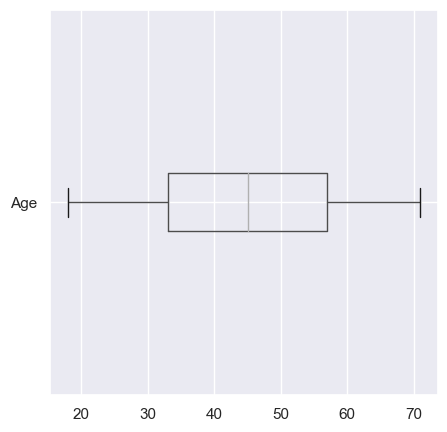

In [38]:
plt.figure(figsize=(5,5))
df[['Age']].boxplot(vert=0)

<AxesSubplot:xlabel='spicy', ylabel='Age'>

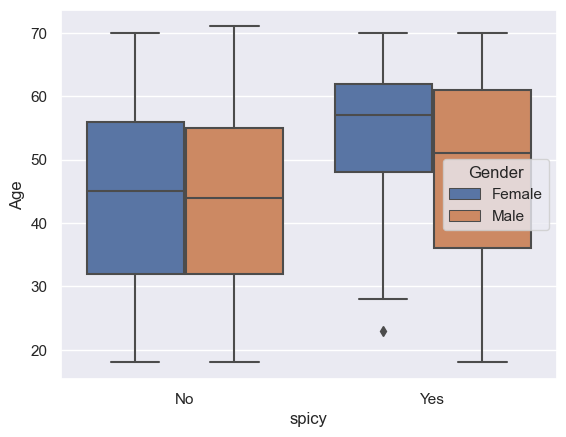

In [41]:
sns.boxplot(data = df,x='spicy',y = 'Age',hue = 'Gender')

<AxesSubplot:xlabel='yummy', ylabel='Age'>

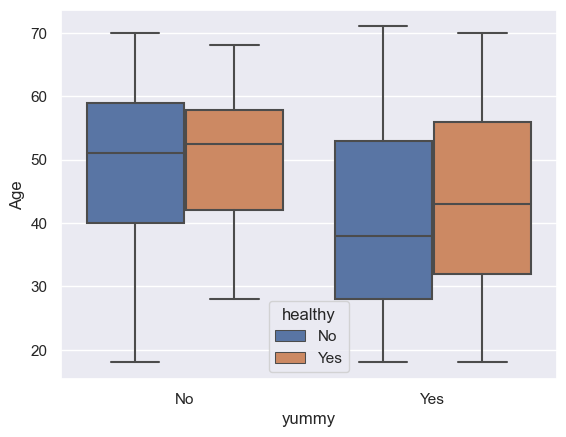

In [44]:
sns.boxplot(data = df,x='yummy',y = 'Age',hue = 'healthy')

<AxesSubplot:xlabel='fattening', ylabel='Age'>

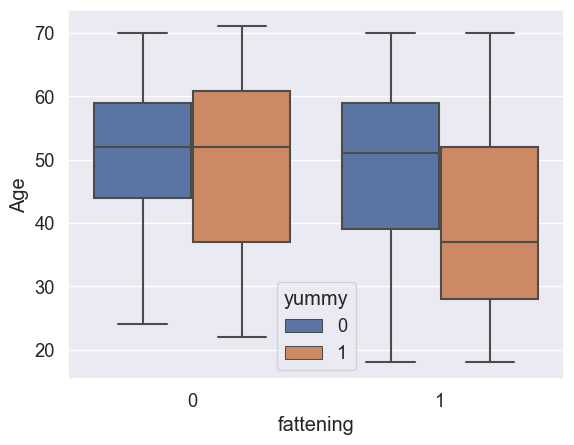

In [57]:
sns.boxplot(data = df,x='fattening',y = 'Age',hue = 'yummy')

In [11]:
df['Like'].value_counts()


+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [45]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        print('\n')
        print ('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: yummy
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: convenient
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
[1 0]


feature: spicy
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: fattening
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
[1 0]


feature: greasy
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: fast
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
[1 0]


feature: cheap
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
[1 0]


feature: tasty
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: expensive
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
[1 0]


feature: healthy
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: disgusting
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Like
['-3', '+2', '+1', '+4', 'I love it!+5', ..., '-2', '+3', '0', '-4', '-1']
Length: 11
Categories (11, object): ['+1', '+2', '+3', '+4', ...

<AxesSubplot:xlabel='Like', ylabel='count'>

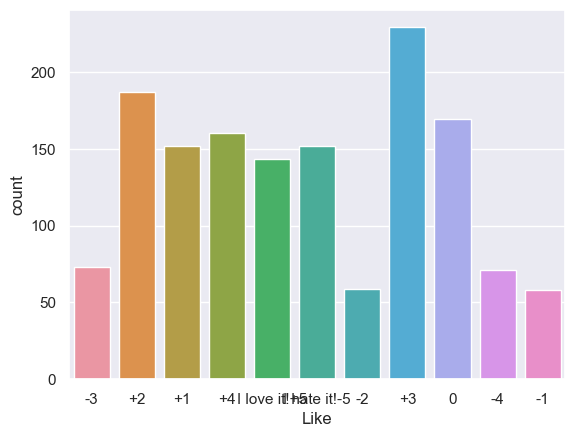

In [12]:
sns.countplot(x='Like',data=df) 


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1431 non-null   int8 
 1   convenient      1431 non-null   int8 
 2   spicy           1431 non-null   int8 
 3   fattening       1431 non-null   int8 
 4   greasy          1431 non-null   int8 
 5   fast            1431 non-null   int8 
 6   cheap           1431 non-null   int8 
 7   tasty           1431 non-null   int8 
 8   expensive       1431 non-null   int8 
 9   healthy         1431 non-null   int8 
 10  disgusting      1431 non-null   int8 
 11  Like            1431 non-null   int8 
 12  Age             1431 non-null   int64
 13  VisitFrequency  1431 non-null   int8 
 14  Gender          1431 non-null   int8 
dtypes: int64(1), int8(14)
memory usage: 41.9 KB


Text(0.5, 1.0, 'Healthy')

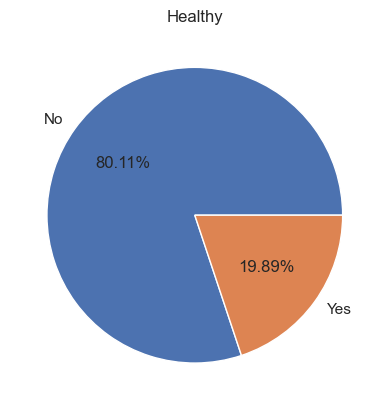

In [13]:
H_values= df['healthy'].value_counts().values
H_label = df['healthy'].value_counts().index
plt.pie(H_values,labels=H_label,autopct='%1.2f%%')
plt.title('Healthy')

<AxesSubplot:>

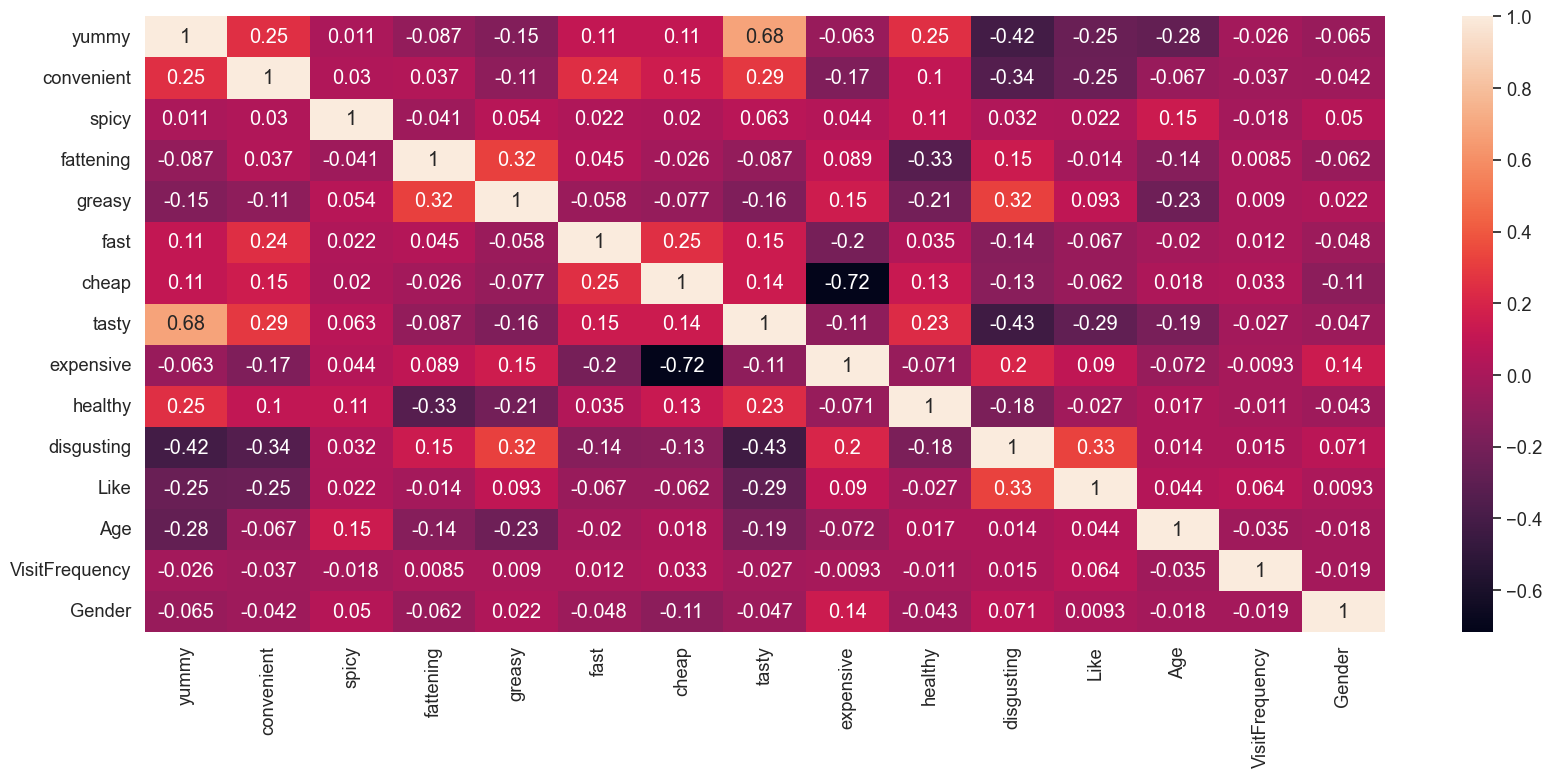

In [50]:
plt.figure(figsize=(20,8))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(),annot= True)

In [51]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1


In [52]:
df.yummy.value_counts(normalize = True)

1    0.549266
0    0.450734
Name: yummy, dtype: float64

In [54]:
df.fattening.value_counts(normalize = True)

1    0.866527
0    0.133473
Name: fattening, dtype: float64

In [58]:
df.greasy.value_counts(normalize = True)

1    0.526904
0    0.473096
Name: greasy, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='VisitFrequency'>

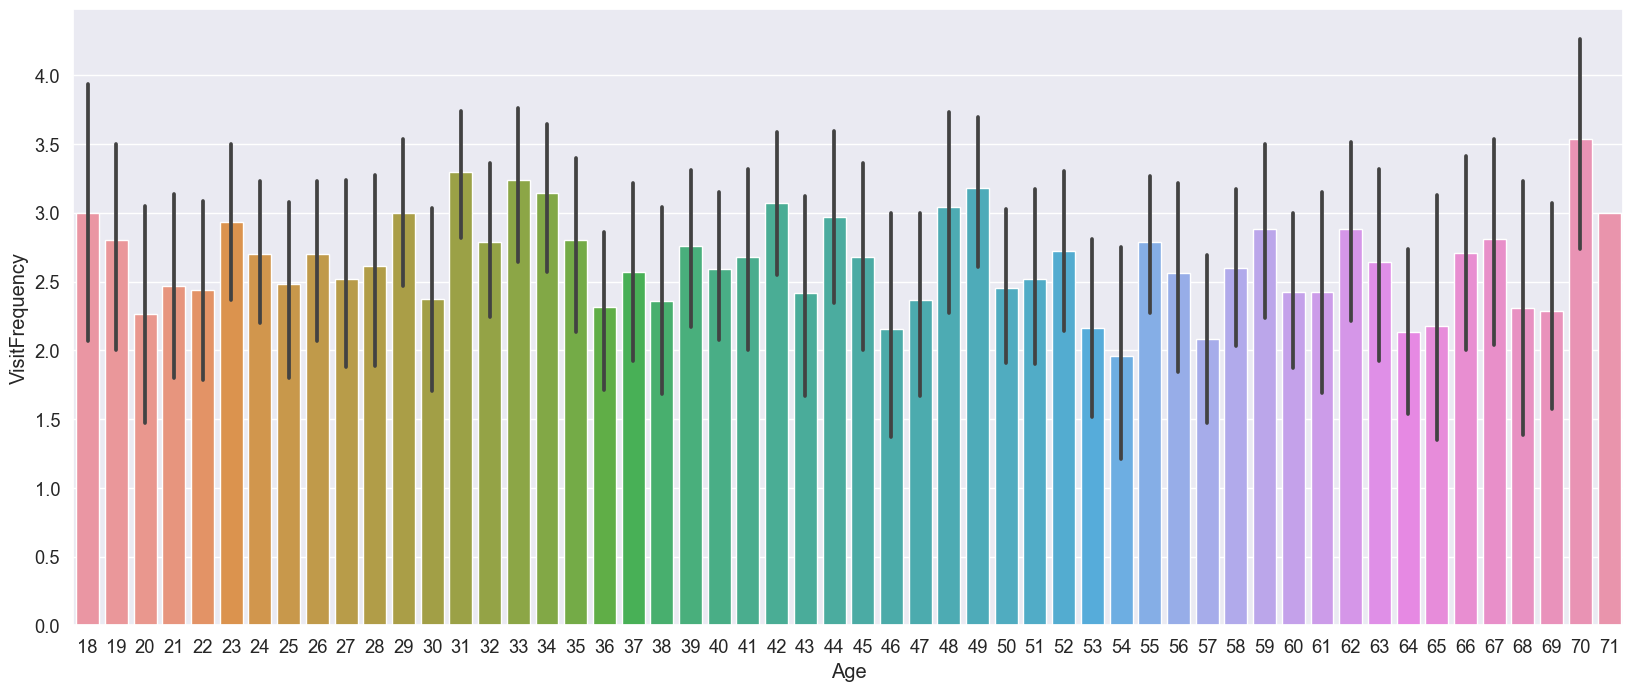

In [60]:

plt.figure(figsize=(20,8))
sns.set(font_scale=1.2)
sns.barplot(x="Age",y="VisitFrequency",data=df)


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yummy,1431.0,0.549266,0.497741,0.0,0.0,1.0,1.0,1.0
convenient,1431.0,0.907058,0.290453,0.0,1.0,1.0,1.0,1.0
spicy,1431.0,0.095038,0.293371,0.0,0.0,0.0,0.0,1.0
fattening,1431.0,0.866527,0.340204,0.0,1.0,1.0,1.0,1.0
greasy,1431.0,0.526904,0.499450,0.0,0.0,1.0,1.0,1.0
fast,1431.0,0.898672,0.301868,0.0,1.0,1.0,1.0,1.0
cheap,1431.0,0.595388,0.490988,0.0,0.0,1.0,1.0,1.0
tasty,1431.0,0.642208,0.479518,0.0,0.0,1.0,1.0,1.0
expensive,1431.0,0.360587,0.480339,0.0,0.0,0.0,1.0,1.0
healthy,1431.0,0.200559,0.400559,0.0,0.0,0.0,0.0,1.0


                   yummy  convenient     spicy  fattening    greasy      fast  \
yummy           1.000000    0.251783  0.011014  -0.087096 -0.149501  0.105388   
convenient      0.251783    1.000000  0.029874   0.037141 -0.105675  0.243447   
spicy           0.011014    0.029874  1.000000  -0.040972  0.054126  0.021957   
fattening      -0.087096    0.037141 -0.040972   1.000000  0.319529  0.045258   
greasy         -0.149501   -0.105675  0.054126   0.319529  1.000000 -0.058437   
fast            0.105388    0.243447  0.021957   0.045258 -0.058437  1.000000   
cheap           0.105946    0.152927  0.019552  -0.026295 -0.076774  0.251627   
tasty           0.683329    0.288270  0.062931  -0.087183 -0.161251  0.145512   
expensive      -0.062656   -0.165618  0.044465   0.089319  0.151917 -0.201183   
healthy         0.250295    0.100224  0.105473  -0.331984 -0.210503  0.035169   
disgusting     -0.415754   -0.338588  0.031801   0.146833  0.321009 -0.137572   
Like           -0.248758   -

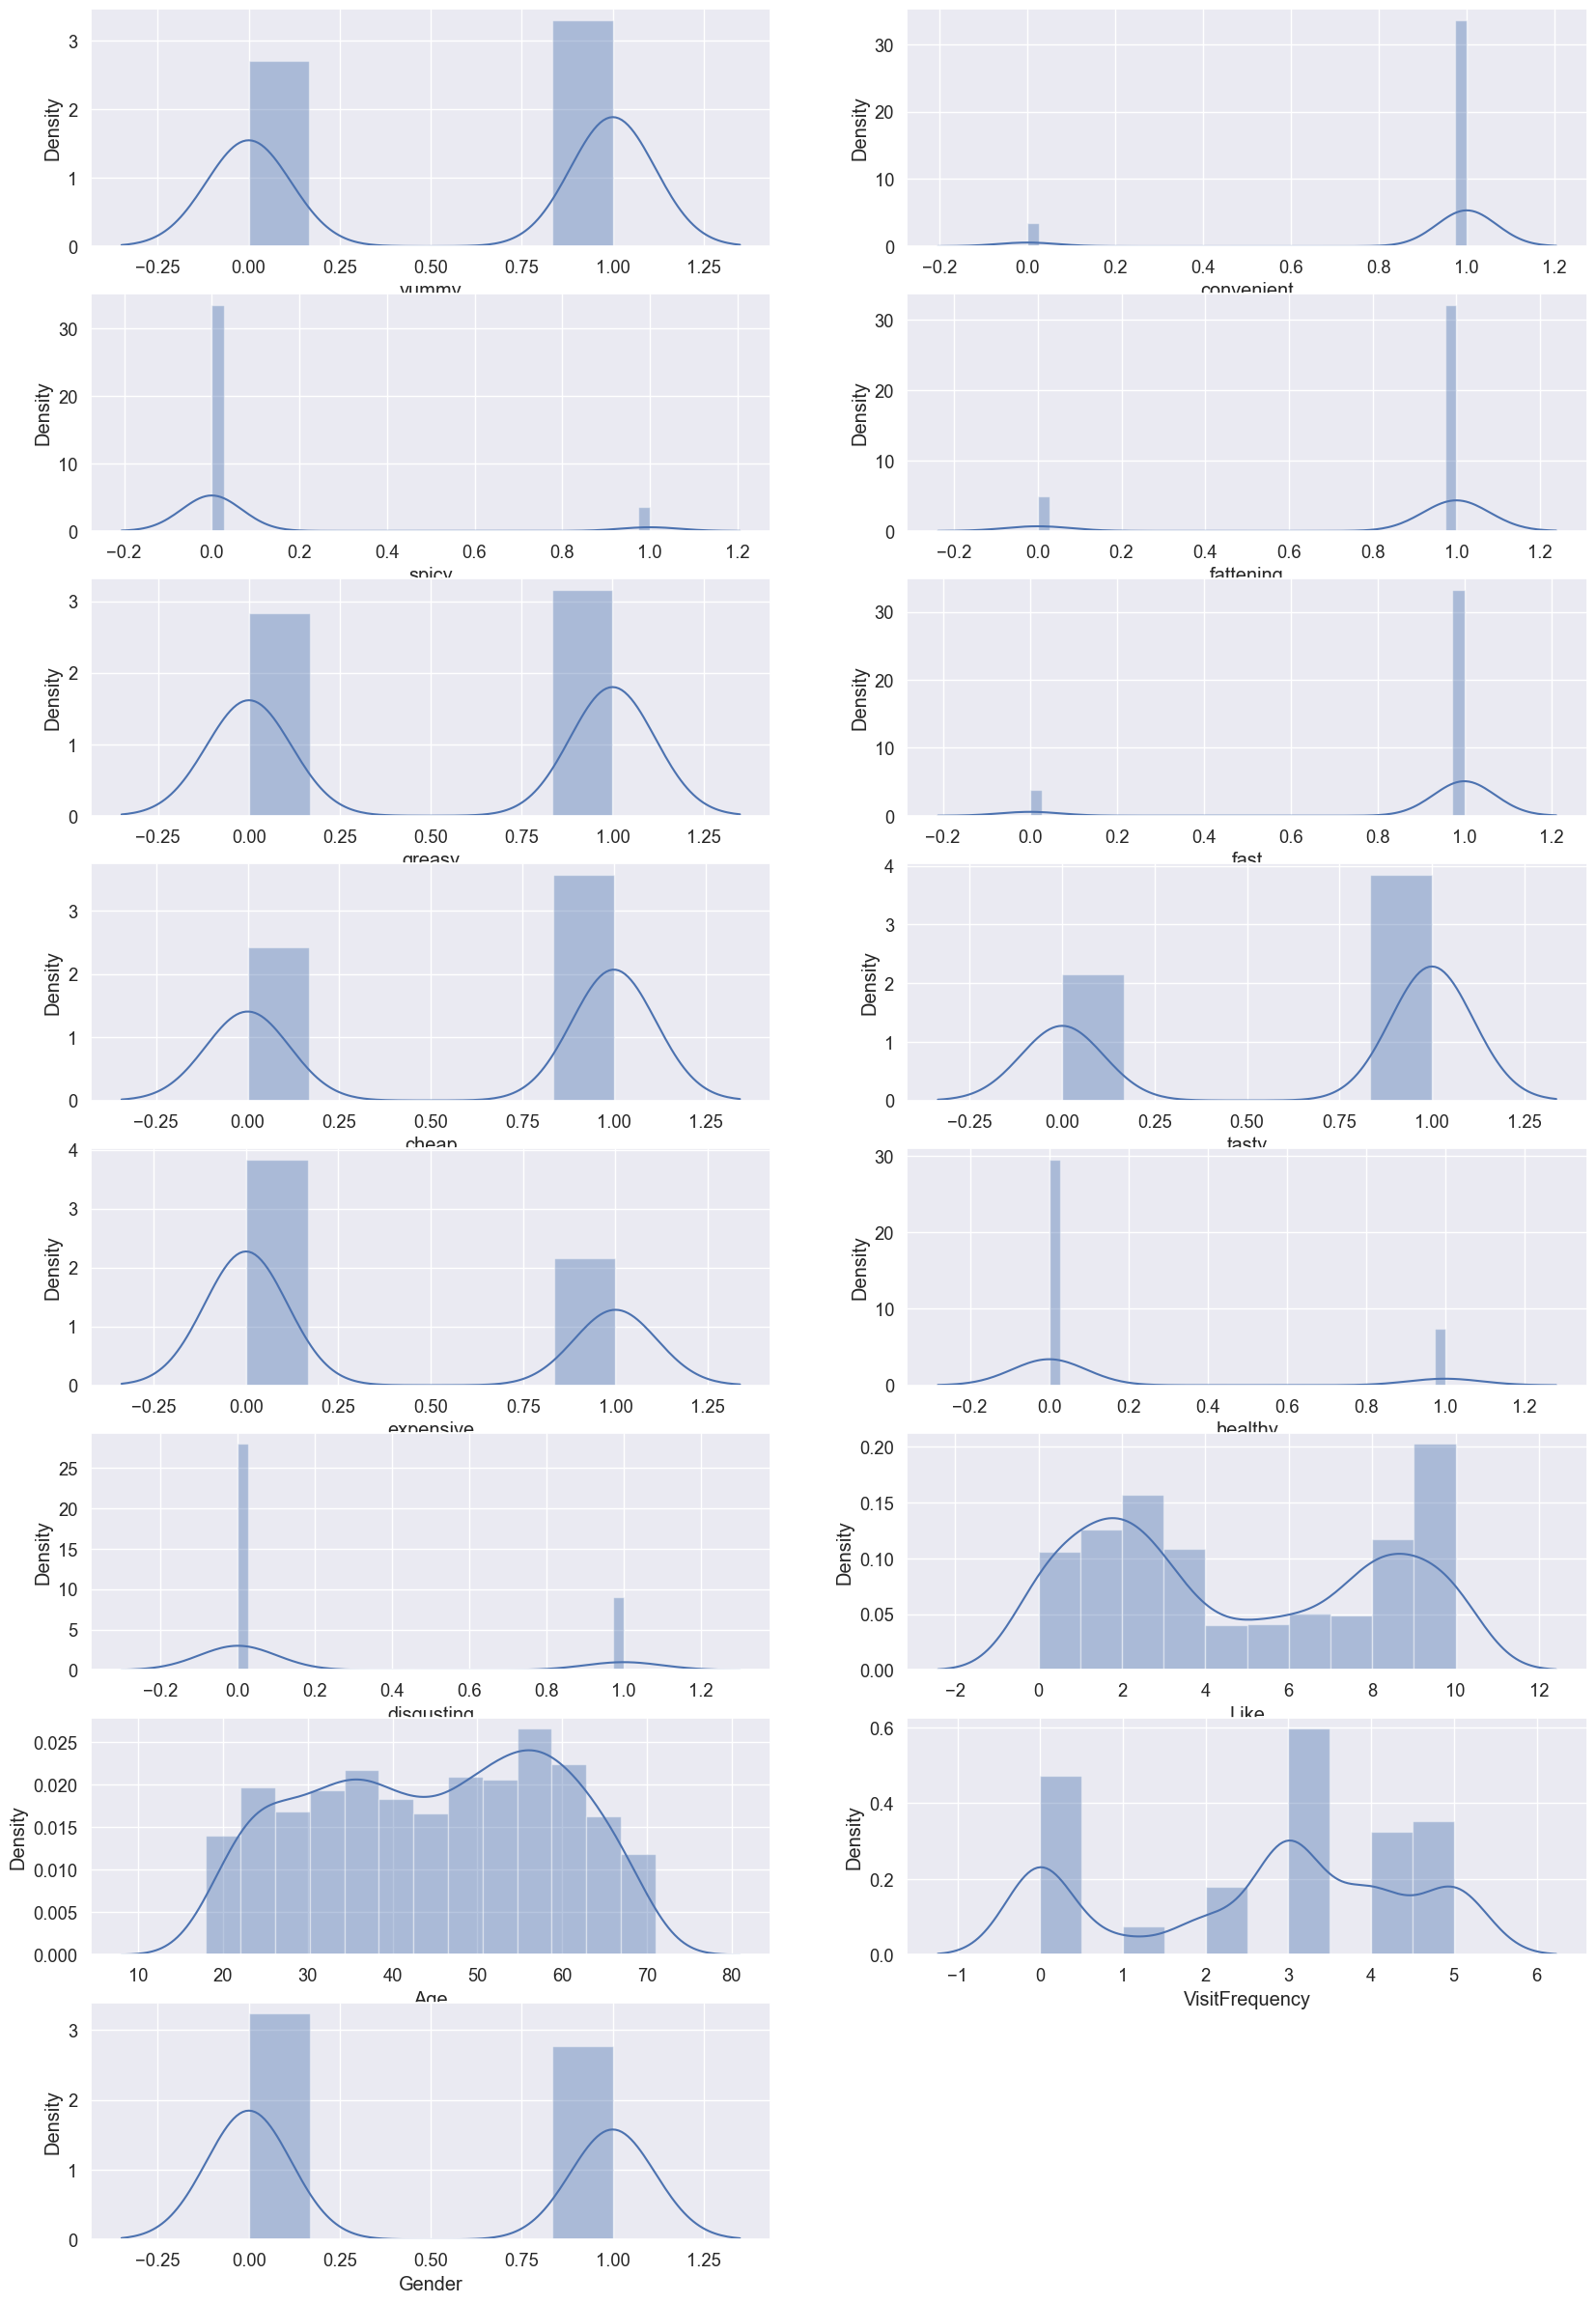

In [62]:
from sklearn.cluster import KMeans
def EDA(df,figuresize):
    cat = []
    con = []
    from warnings import filterwarnings
    filterwarnings("ignore")
    u = int((df.shape[1]+1)/2)
    plt.figure(figsize=figuresize)
    x = 1

    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
            plt.subplot(u,2,x)
            x = x+1
            sns.countplot(df[i])
        else:
            con.append(i)
            plt.subplot(u,2,x)
            x = x+1
            sns.distplot(df[i])

    print(df.corr())

# applying the function on the dataset
EDA(df, (20, 30))

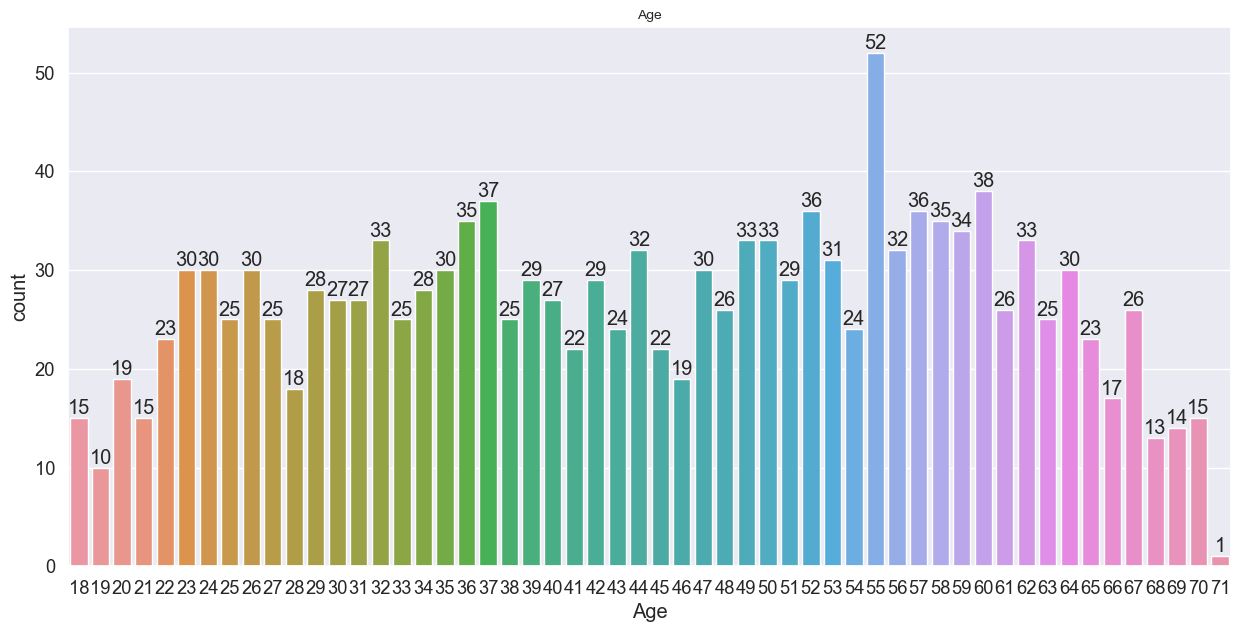

In [64]:
plt.rcParams['figure.figsize'] = (15,7)
data = sns.countplot(x=df['Age'])
data.bar_label(data.containers[0])
plt.title('Age', fontsize = 10)
plt.show()

In [65]:
score = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(df)
    score.append(kmeans.inertia_)

In [ ]:
df.spicy.value_counts(normalize = True)

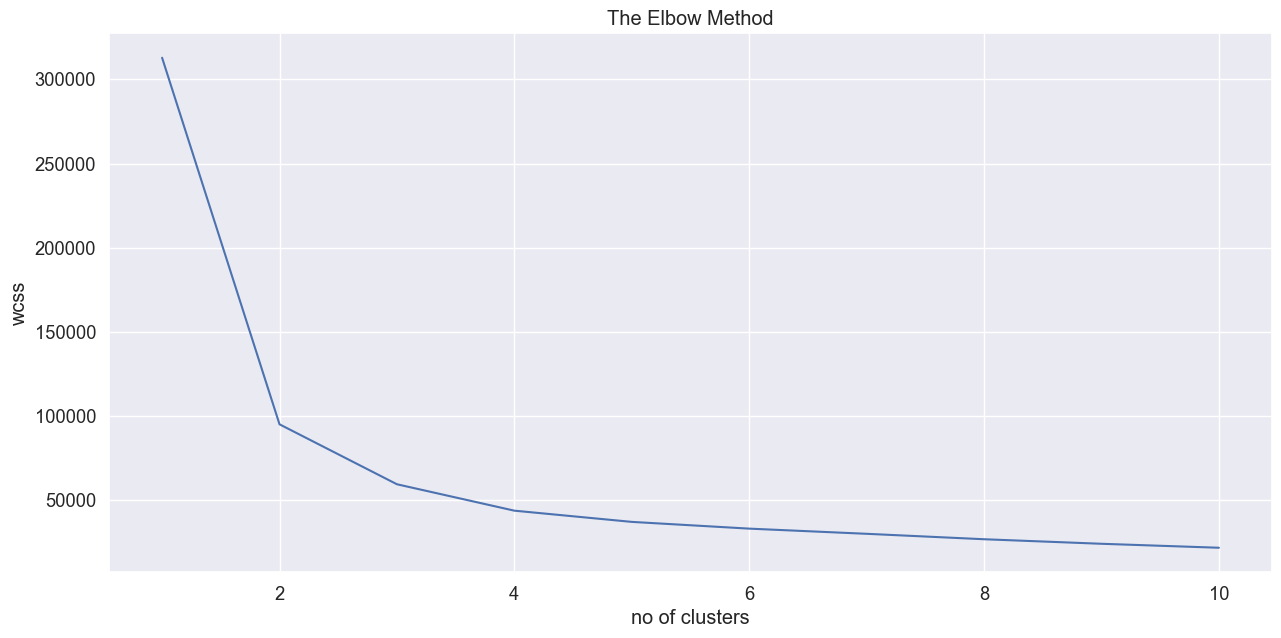

In [66]:
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [67]:
print(score)

[312841.5122292104, 95030.61502167565, 59407.0862012855, 43712.240815837096, 37048.27593922227, 33042.004230682025, 29965.332632585054, 26738.323921501767, 24040.43914772785, 21680.701627198076]


In [68]:
#we can do the same using pca
from sklearn.decomposition import PCA

pca = PCA(n_components=7)

principalComponents = pca.fit_transform(df)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['p1','p2','p3','p4','p5','p6','p7'])

In [69]:
principalDf

,p1,p2,p3,p4,p5,p6,p7
0,-16.379122,1.070443,2.609721,0.170292,-0.194049,-0.263104,0.665382
1,-6.300267,-3.854171,2.441222,0.008213,0.107714,-0.755145,-0.549101
2,-17.299511,-4.934715,2.355788,0.634975,0.500358,-0.728889,-0.216809
3,-24.304993,-1.861129,-1.552514,-0.208961,-0.415185,-0.704121,-0.881664
4,-4.306022,-3.635757,-0.551245,0.369972,-0.765927,0.638494,-0.118245
...,...,...,...,...,...,...,...
1426,-2.385457,4.521133,-2.154234,1.352889,0.273933,0.249673,-0.167661
1427,8.702841,-3.527635,-1.487260,-0.781675,0.016193,-0.173654,0.494713
1428,-7.305839,-2.740494,-0.505176,0.048484,0.958599,-0.617818,0.278293
1429,3.661587,-1.777864,2.578713,-1.024546,0.252029,0.872006,0.220972


In [70]:
kmeans = KMeans(n_clusters =2, init="k-means++", random_state=10)
kmeans.fit(principalDf)

KMeans(n_clusters=2, random_state=10)

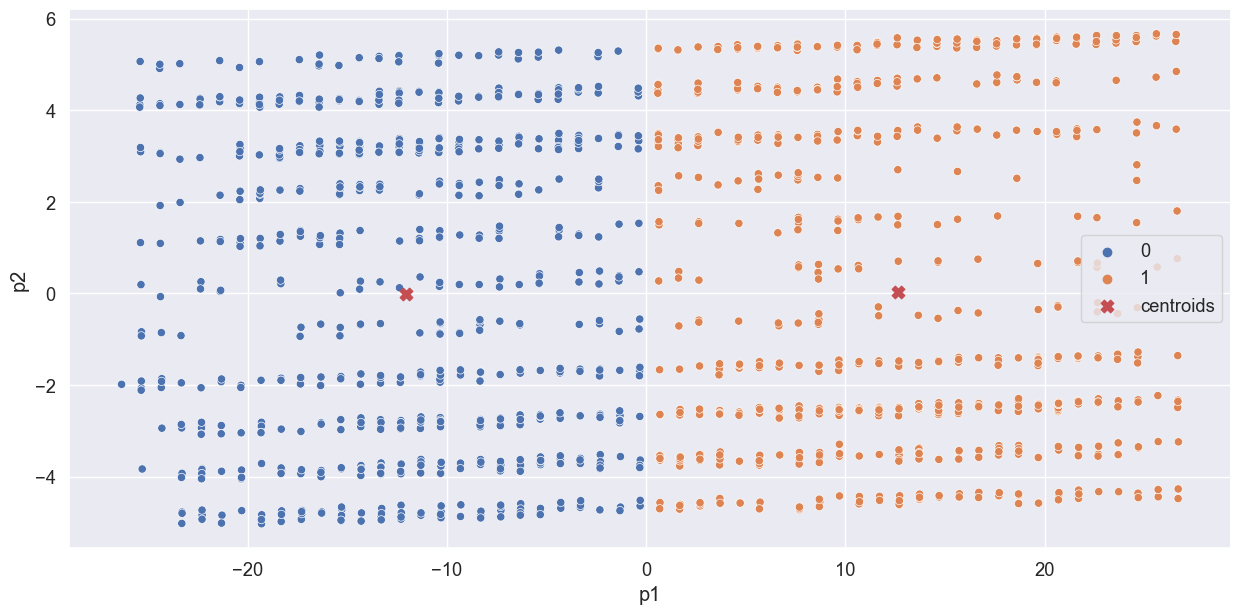

In [71]:
sns.scatterplot(data=principalDf, x="p1", y="p2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

C:\Users\SHUBRADIP\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'No'

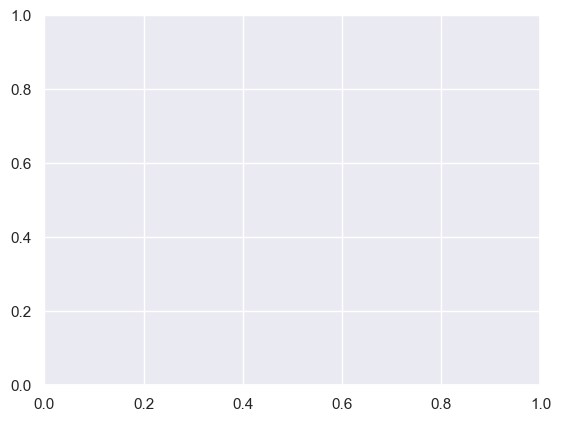

In [31]:
sns.distplot(df['yummy'])
plt.show()
sns.distplot(df['convenient'])
plt.show()
sns.distplot(df['spicy'])
plt.show()
sns.distplot(df['fattening'])
plt.show()
sns.distplot(df['greasy'])
plt.show()
sns.distplot(df['fast'])
plt.show()
sns.distplot(df['cheap'])
plt.show()
sns.distplot(df['tasty'])
plt.show()
sns.distplot(df['expensive'])
plt.show()
sns.distplot(df['Healthy'])
plt.show()
sns.distplot(df['Like'])
plt.show()
sns.distplot(df['Age'])
plt.show()
sns.distplot(df['VisitFrequency'])
plt.show()
sns.distplot(df['Gender'])